# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [6]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

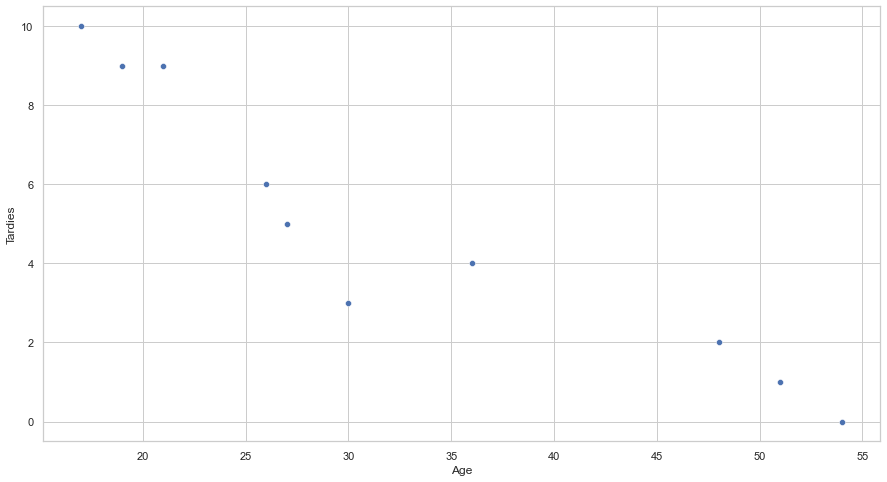

In [7]:
# Your code here.
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. It seems to be a negative relationship within the data - the older students are, the less number of tardies they have

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.There is a negative relationship between both variables
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [9]:
student_data.cov() # The negative value oh the relation between Tardies & Age means they move in opposite directions

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Different options:
    # lr
    # lr fit
    # lr.coeff

In [11]:
lr = LinearRegression()

In [13]:
lr.fit(
    X = student_data[["Age"]], 
    y = student_data["Tardies"] 
)

LinearRegression()

In [14]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(f"beta_0: {beta_0}, which is the intercept\nbeta_1: {beta_1}, which is the slope or coef_[0]")

beta_0: 12.888803363135771, which is the intercept
beta_1: -0.2428207709159809, which is the slope or coef_[0]


In [16]:
student_data2 = student_data.copy()
student_data2["prediction_through_lr_scikitlearn"] = (student_data2.Age * beta_1) + beta_0
student_data2

,Age,Tardies,prediction_through_lr_scikitlearn
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


In [ ]:
# Have created the prediction using the linear regression model

Plot your regression model on your scatter plot.

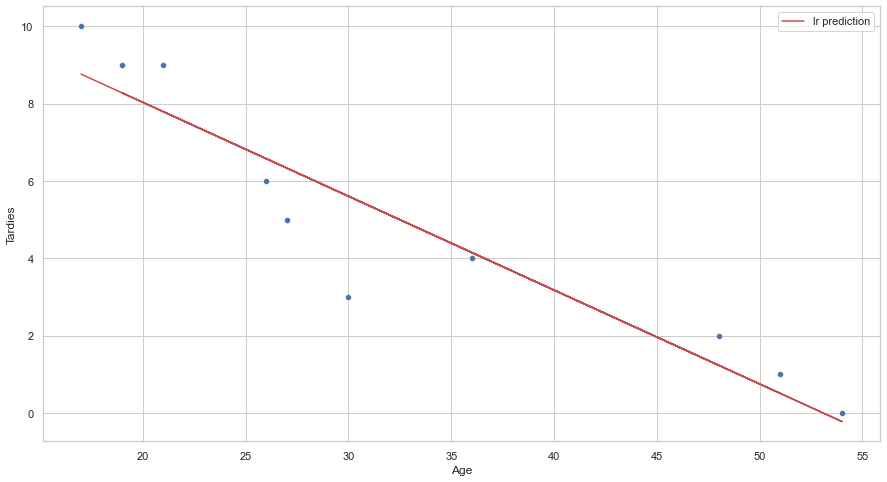

In [26]:
sns.scatterplot(x=student_data2["Age"], y=student_data2["Tardies"])
plt.plot(student_data2[["Age"]], student_data2["prediction_through_lr_scikitlearn"], color='r', label='lr prediction') # greater Mean Average Error
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# We can say age is a good predictor of tardiness given the linear regression model (prediction), however the best way to check if it's good is via the value of the R2

In [27]:
from sklearn import metrics

In [35]:
mae = metrics.mean_absolute_error(student_data2.Tardies, student_data2.prediction_through_lr_scikitlearn)
mse = metrics.mean_squared_error(student_data2.Tardies, student_data2.prediction_through_lr_scikitlearn)
rmse = np.sqrt(metrics.mean_squared_error(student_data2.Tardies, student_data2.prediction_through_lr_scikitlearn))
r2 = metrics.r2_score(student_data2.Tardies, student_data2.prediction_through_lr_scikitlearn)

In [36]:
r2 # Given the R2 is 0.88, we can say the model is a pretty good predictor of tardiness

0.8820265558250109

In [ ]:
# Checking R2 with results.summary:

In [37]:
results = smf.ols("Tardies ~ Age", data=student_data2).fit()

In [38]:
results.summary()

C:\Users\Marc\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        15:50:10   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [39]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('../lab-regression-analysis/vehicles.csv')

In [40]:
vehicles.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
6390,Chevrolet,K5/K10 Blazer 4WD,1984,5.0,8.0,Manual 4-spd,4-Wheel or All-Wheel Drive,Special Purpose Vehicle 4WD,Regular,23.543571,12,16,14,634.785714,2400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [41]:
# Your response here. 
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [ ]:
# Fuel Barrels/Year & Fuel Cost/Year will be the variable more positively correlated with CO2 Emission Grams/Mile - the bigger either of them are, the bigger CO2 is.
# On the other hand, Highway MPG and Combined MPG are negatively correlated with CO2 - the smaller they are, the bigger CO2 is.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [50]:
results = smf.ols("vehicles['CO2 Emission Grams/Mile'] ~ vehicles['Fuel Barrels/Year'] + vehicles['Year'] + vehicles['Cylinders'] + vehicles['Combined MPG'] + vehicles['Fuel Cost/Year']", data=vehicles).fit().summary()

In [ ]:
# Your response here. 
# I'm using the OLS function to come up with a summary table for a regression model of a dependent variable and how other independent variables impact / relates to that one

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [51]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vehicles['CO2 Emission Grams/Mile']   R-squared:                       0.981
Model:                                             OLS   Adj. R-squared:                  0.981
Method:                                  Least Squares   F-statistic:                 3.687e+05
Date:                                 Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                                         16:21:43   Log-Likelihood:            -1.5173e+05
No. Observations:                                35952   AIC:                         3.035e+05
Df Residuals:                                    35946   BIC:                         3.035e+05
Df Model:                                            5                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       769.8883     19.392     39.702      0.000     731.880     807.897
vehicles['Fuel Barrels/Year']    19.0529      0.061    311.600      0.000      18.933      19.173
vehicles['Year']                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
vehicles['Cylinders']             1.8788      0.083     22.598      0.000       1.716       2.042
vehicles['Combined MPG']         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
vehicles['Fuel Cost/Year']        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# The R2 of this model is pretty high (0.981) - the closer to 1, the better the model is.
# Given the value of all p-values for all the independent variables (0), that means there is a c. 0% chance the specific independent variable has no effect on the dependent variable. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [70]:
# Your code here. 
x_list = [1,3,4,6,8,9,11,14]
y_list = [1,2,4,4,5,7,8,13]
my_party = {
    "X": x_list,
    "Y": y_list
}

In [71]:
my_party = pd.DataFrame.from_dict(my_party)
my_party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [94]:
my_party["Z"] = my_party["X"] - my_party["Y"]
my_party

,X,Y,Z
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

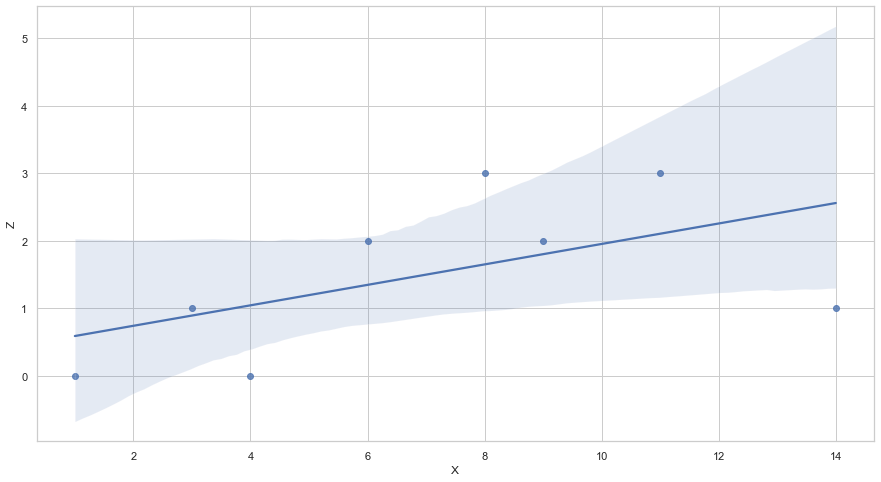

In [97]:
# Your code here.
sns.regplot(x="X", y="Z", data=my_party, ci=95);

In [98]:
# Your response here. 
results = smf.ols("Z ~ X", data=my_party).fit().summary()

C:\Users\Marc\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [99]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     2.609
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.157
Time:                        17:41:29   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4394      0.759      0.579      0.584      -1.418       2.297
X              0.1515      0.094      1.615      0.157      -0.078       0.381
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                          -0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
# Your response here. 
# I can see there is a positive relationship between the variables - i.e. the more people invited, the more people that don't attend. Despite this relationship, there is a value that seem to be outlier (it clearly falls outside the CI of 95%).

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [100]:
# Your code here. 
x_list = [1,3,4,6,8,9,11]
y_list = [1,2,4,4,5,7,8]
my_party2 = {
    "X": x_list,
    "Y": y_list
}

In [101]:
my_party2 = pd.DataFrame.from_dict(my_party2)
my_party2

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [102]:
my_party2["Z"] = my_party2["X"] - my_party2["Y"]
my_party2

,X,Y,Z
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3


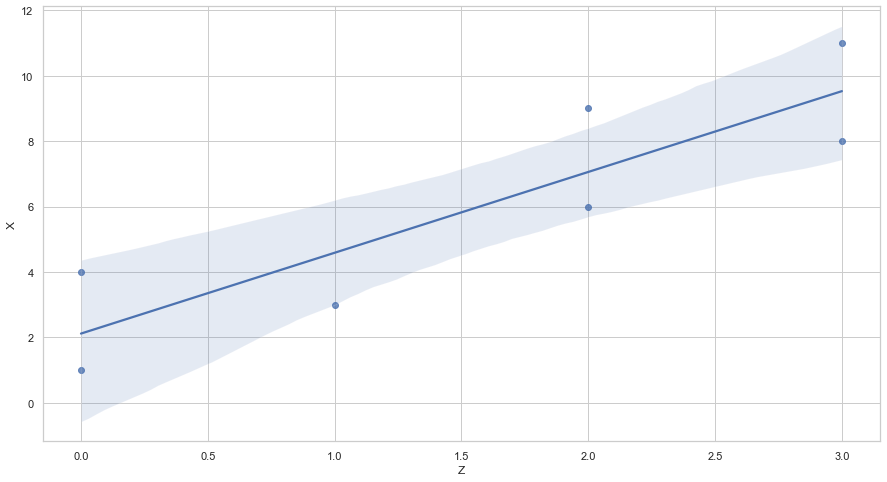

In [103]:
sns.regplot(x="Z", y="X", data=my_party2, ci=95);

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [104]:
results2 = smf.ols("Z ~ X", data=my_party2).fit().summary()

C:\Users\Marc\miniconda3\envs\ironhack\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [105]:
results2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00839
Time:                        17:43:18   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3233      0.513     -0.630      0.556      -1.642       0.996
X              0.3158      0.075      4.213      0.008       0.123       0.508
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                          -0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The model getting rid of the outlier is way more robust (R2 higher).